In [6]:
!pip install cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 86.1 MB/s eta 0:00:00


In [1]:
import xarray as xr

In [2]:
ds = xr.open_dataset('wind_frequency.nc')

In [3]:
ds

<xarray.Dataset> Size: 193kB
Dimensions:                (longitude: 235, latitude: 101)
Coordinates:
  * longitude              (longitude) float64 2kB 235.0 235.2 ... 293.2 293.5
  * latitude               (latitude) float64 808B 24.5 24.75 ... 49.25 49.5
Data variables:
    high_wind_event_count  (latitude, longitude) float64 190kB ...

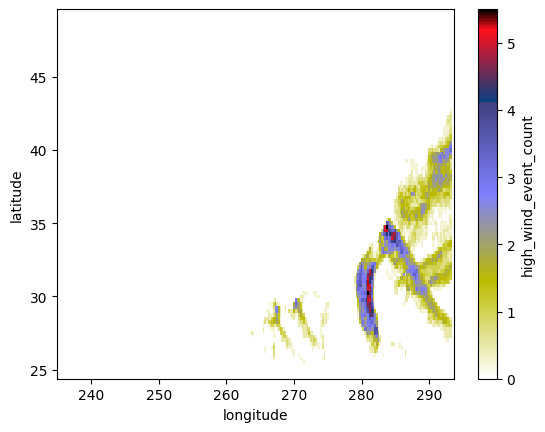

In [5]:
ds.high_wind_event_count.plot(cmap='gist_stern_r')

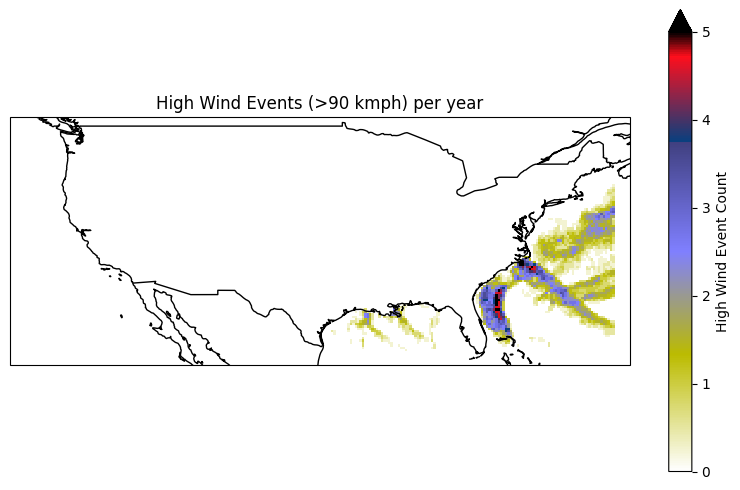

In [12]:
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Create the plot
fig, ax = plt.subplots(1, 1, figsize=(10, 6), subplot_kw={'projection': ccrs.PlateCarree()})

# Plot the wind event count
ds.high_wind_event_count.plot(
    ax=ax,
    cmap='gist_stern_r',
    transform=ccrs.PlateCarree(),  # Important if your data is in lat/lon
    cbar_kwargs={'label': 'High Wind Event Count'}, vmax=5
)

# Add geographic features
ax.add_feature(cfeature.BORDERS, edgecolor='black', linewidth=1)
ax.coastlines()

# Optional: zoom into the USA
ax.set_extent([-130, -65, 24, 50], crs=ccrs.PlateCarree())  # USA extent

plt.title("High Wind Events (>90 kmph) per year")
plt.show()

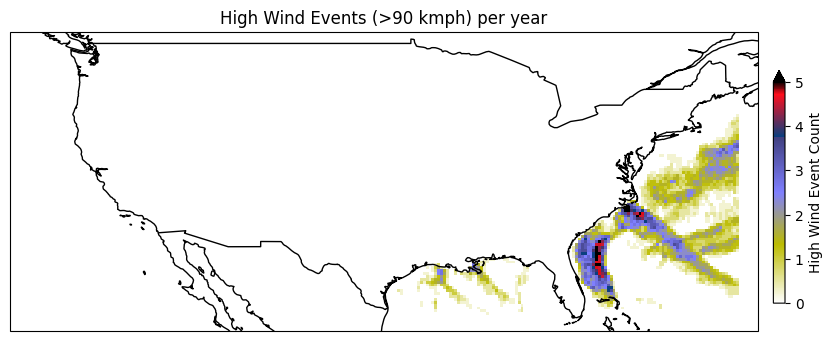

In [18]:
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': ccrs.PlateCarree()})

# Plot and capture the mappable
mappable = ds.high_wind_event_count.plot(
    ax=ax,
    cmap='gist_stern_r',
    transform=ccrs.PlateCarree(),
    add_colorbar=False,
    vmax=5
)

# Add colorbar manually and make it smaller
cbar = fig.colorbar(
    mappable,
    ax=ax,
    orientation='vertical',
    fraction=0.015,  # Make colorbar thinner (smaller fraction)
    pad=0.02 , extend='max'        # Slightly tighter spacing to the plot
)
cbar.set_label("High Wind Event Count")

# Add geographic features
ax.add_feature(cfeature.BORDERS, edgecolor='black', linewidth=1)
ax.coastlines()

# Zoom into the USA
ax.set_extent([-130, -65, 24, 50], crs=ccrs.PlateCarree())

plt.title("High Wind Events (>90 kmph) per year")
plt.show()